# BERT


The BERT model was proposed in BERT: ***`Pre-training of Deep Bidirectional Transformers`*** *italicized text* for Language Understanding by Jacob Devlin, Ming-Wei Chang, Kenton Lee and Kristina Toutanova. It’s a bidirectional transformer pretrained using a combination of masked language modeling objective and next sentence prediction on a large corpus comprising the Toronto Book Corpus and Wikipedia.

# Importing Libraries

This cell installs the necessary libraries for the project:

`tensorflow pandas and numpy`, For Machine Learning and Data analysis.


# Transformers

To use pretrained features we are deep diving into Transformers.

**Transformers:**

Transformers are a class of deep learning models that have revolutionized various **`natural language processing (NLP)`** tasks. Unlike traditional sequence models like **`recurrent neural networks (RNNs)`** or **`convolutional neural networks (CNNs)`**, transformers rely entirely on self-attention mechanisms to draw global dependencies between input and output tokens. Key components of transformers include:


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

from tqdm.auto import tqdm
import tensorflow as tf

# We imported BertTokenizer to tokenize our dataset
from transformers import BertTokenizer

# Load Dataset

Load the dataset locally or can be load from drive as well.

In [ ]:
df = pd.read_csv('/content/Train_image.csv')

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,extracted_text,labels
0,77,77,SR CLIENT NAME: : VENDOR NAME: M/s DANGOTE OIL...,0
1,183,86,LIST OF RELATED DRAWINGS SR. NO. DRG. NO. REV....,2
2,276,88,"1 2 3 4 5 6 7 8 9 10 "" 12 13 14 15 16 7 18 19 ...",1
3,124,27,1 BK 8 a NOZZLE SCHEDULE TABLE DESIGN DATA FLA...,2
4,133,36,EIL PR NO.: A545-101-EE-PR6170/5029 Rev.0 EQPT...,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    284 non-null    int64 
 1   Unnamed: 0      284 non-null    int64 
 2   extracted_text  284 non-null    object
 3   labels          284 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.0+ KB


We can drop the clumns which are not required for training as a step of data visualization.

`axis=1` represent Columns.

In [ ]:
df = df.drop(['Unnamed: 0.1','Unnamed: 0'],axis = 1)

In [ ]:
df.head()

,extracted_text,labels
0,SR CLIENT NAME: : VENDOR NAME: M/s DANGOTE OIL...,0
1,LIST OF RELATED DRAWINGS SR. NO. DRG. NO. REV....,2
2,"1 2 3 4 5 6 7 8 9 10 "" 12 13 14 15 16 7 18 19 ...",1
3,1 BK 8 a NOZZLE SCHEDULE TABLE DESIGN DATA FLA...,2
4,EIL PR NO.: A545-101-EE-PR6170/5029 Rev.0 EQPT...,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   extracted_text  284 non-null    object
 1   labels          284 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.6+ KB


# Cleaning

Cleaning removing stop words punctuations and some other NLP cleaning

In [ ]:
df['extracted_text'][0]

'SR CLIENT NAME: : VENDOR NAME: M/s DANGOTE OILREFINING ep CHINA PETROLEUM TECHNOLOGY DANG OTE COMPANY LTD AND DEVELOPMENT CORPORATION aoa —— SUB-VENDOR NAME: Bar Clos 2 NIA UATTED Be ee ons LTD faypce NINGBO TIANYI PETROCHEMICAL HEAVY Sees Gawaeann = . \\ onet EQUIPMENT MANUFACTURING CO.LTD DANGOTE REFINERY AND PETROCHEMICAL PROJECT PROJECT NO.: A545 DOC TITLE: CRUDE COLUMN -General Arrangement Drawing-101-CC-1001 PR NO.: A545-101-CC-PR-6152-5005 DOC/DRW NO.(NBTY): 2016-T-001-01-02, 2016-T-001-01-03 2016-T-001-01,2016-T-001-01-01, REV NO.:06 DOC NO.(CLIENT): A545-6152-5005-VD-101-CC-1001-013 PAGE 1 OF 6 DOCUMENT TITLE: CRUDE COLUMN-General Arrangement Drawing-101-CC-1001 Review Code 1 O No comment. Review Code 2 O Proceed with manufacture/fabrication as per commented document. Revised document required. Review Code 3 O Document does not conform to basic requirements as marked. Resubmit for review. R ORetained for records. Vv OVoid. 06 2019.1.17 ISSUE FOR REVIEM us Lit Pett ° als a 05 

# Environment setup for text preprocessing

`from sklearn.feature_extraction import text:` Imports the text module for text feature extraction from scikit-learn.

`import nltk:` Imports the NLTK library for natural language processing tasks.

`nltk.download('wordnet'):` Downloads the WordNet corpus from NLTK for lexical analysis.

**lexical analysis**:
Lexical analysis involves processing and analyzing words and their lexical properties in text data.

In [ ]:
from sklearn.feature_extraction import text
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

This snippet downloads the 'punkt' tokenizer models from NLTK, which are necessary for tokenizing text into individual words or sentences. This is a preprocessing step commonly used in natural language processing tasks like text classification, sentiment analysis, and machine translation.

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Lemmetization

`WordNetLemmatizer ` class from the NLTK library, which is used for lemmatization in natural language processing tasks.

Lemmatization is the process of `reducing words to their base or dictionary` form (called lemma) while still retaining their meaning. Unlike stemming, which simply chops off the ends of words to remove prefixes or suffixes, lemmatization considers the context and part of speech of the word to ensure that the resulting lemma is a valid word.

For example:

Lemmatization would convert `"running" to "run" and "better" to "good".`

In [ ]:
from nltk.stem import WordNetLemmatizer
import string
import re

Clean Function Custom logic: Trial and error

We firstly removed Named entities(like name, place and other names but later these come to important feature for classification so we included that).

In [ ]:
df['extracted_text'][0]

'SR CLIENT NAME: : VENDOR NAME: M/s DANGOTE OILREFINING ep CHINA PETROLEUM TECHNOLOGY DANG OTE COMPANY LTD AND DEVELOPMENT CORPORATION aoa —— SUB-VENDOR NAME: Bar Clos 2 NIA UATTED Be ee ons LTD faypce NINGBO TIANYI PETROCHEMICAL HEAVY Sees Gawaeann = . \\ onet EQUIPMENT MANUFACTURING CO.LTD DANGOTE REFINERY AND PETROCHEMICAL PROJECT PROJECT NO.: A545 DOC TITLE: CRUDE COLUMN -General Arrangement Drawing-101-CC-1001 PR NO.: A545-101-CC-PR-6152-5005 DOC/DRW NO.(NBTY): 2016-T-001-01-02, 2016-T-001-01-03 2016-T-001-01,2016-T-001-01-01, REV NO.:06 DOC NO.(CLIENT): A545-6152-5005-VD-101-CC-1001-013 PAGE 1 OF 6 DOCUMENT TITLE: CRUDE COLUMN-General Arrangement Drawing-101-CC-1001 Review Code 1 O No comment. Review Code 2 O Proceed with manufacture/fabrication as per commented document. Revised document required. Review Code 3 O Document does not conform to basic requirements as marked. Resubmit for review. R ORetained for records. Vv OVoid. 06 2019.1.17 ISSUE FOR REVIEM us Lit Pett ° als a 05 

# Cleaning Function

The cleaning process involves several steps to preprocess text data for natural language processing tasks like text classification. Here's an explanation of each step:

Named Entity Removal:

Named entities are specific named objects or concepts, such as people, organizations, or locations, identified by NER (Named Entity Recognition) models like SpaCy.

We used SpaCy to identify named entities in the text and remove them. This is because named entities often carry specific information that may not be relevant for our text classification task.

Lowercasing and Stripping: Convert the entire text to lowercase to ensure consistency (e.g., "Word" and "word" are treated the same).

Strip leading and trailing whitespace to remove any unnecessary spaces. Replacing Special Characters and Digits:

Remove special characters and digits from the text. Special characters and digits often do not carry significant semantic meaning and can be noise in the data. In this step, we replace special characters and digits with empty strings. Stopword Removal:

Stopwords are common words like "the," "is," "and," etc., that occur frequently in a language but often do not carry important information for text analysis. We use a predefined set of stopwords from the text.ENGLISH_STOP_WORDS set provided by scikit-learn to remove stopwords from the text. Lemmatization:

Lemmatization is the process of reducing words to their base or dictionary form (i.e., lemmas). This step helps in normalizing the text by reducing inflected words to a common base form. We use the WordNet Lemmatizer from the NLTK library to perform lemmatization on the cleaned text.

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

stopwords = text.ENGLISH_STOP_WORDS
lemmatizer = WordNetLemmatizer()

def clean(doc):
    # # text_no_namedentities = []
    # document = nlp(doc)
    # ents = [e.text for e in document.ents]
    # for item in document:
    #     if item.text in ents:
    #         pass
    #     else:
    #         text_no_namedentities.append(item.text)
    # doc = (" ".join(text_no_namedentities))

    doc = doc.lower().strip()
    # doc = doc.replace("</br>", " ")
    # doc = doc.replace("-", " ")
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])
    doc = "".join([lemmatizer.lemmatize(word) for word in doc])
    return doc

After Cleaning the dataset we can see

But after cleaning dataset and multiple iterations we are loosing information as our Industrial documents contains very important characters which can play important role in feature selection. So we modified aour Cleaning and preprocessing part.

In [ ]:
# clean(df['extracted_text'][0])

In [ ]:
# df['extracted_text'] = df['extracted_text'].apply(clean)
df.head()
# df['extracted_text'][0]

,extracted_text,labels
0,SR CLIENT NAME: : VENDOR NAME: M/s DANGOTE OIL...,0
1,LIST OF RELATED DRAWINGS SR. NO. DRG. NO. REV....,2
2,"1 2 3 4 5 6 7 8 9 10 "" 12 13 14 15 16 7 18 19 ...",1
3,1 BK 8 a NOZZLE SCHEDULE TABLE DESIGN DATA FLA...,2
4,EIL PR NO.: A545-101-EE-PR6170/5029 Rev.0 EQPT...,2


In [ ]:
df.head(5)

,extracted_text,labels
0,SR CLIENT NAME: : VENDOR NAME: M/s DANGOTE OIL...,0
1,LIST OF RELATED DRAWINGS SR. NO. DRG. NO. REV....,2
2,"1 2 3 4 5 6 7 8 9 10 "" 12 13 14 15 16 7 18 19 ...",1
3,1 BK 8 a NOZZLE SCHEDULE TABLE DESIGN DATA FLA...,2
4,EIL PR NO.: A545-101-EE-PR6170/5029 Rev.0 EQPT...,2


<Axes: ylabel='labels'>

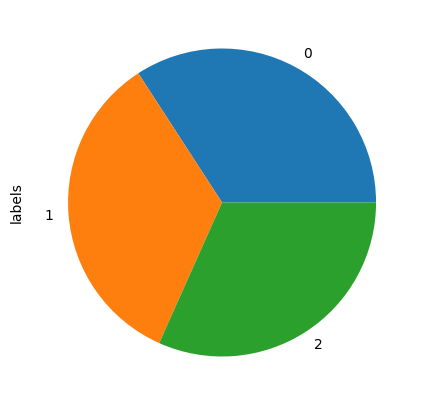

In [ ]:
df.labels.value_counts().plot(kind='pie', figsize=(5,5))

Split dataset into train and test for tuning in our custom dataset.




In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['extracted_text'],df['labels'], stratify=df['labels'])
X_train.head(10)

1      LIST OF RELATED DRAWINGS SR. NO. DRG. NO. REV....
39     THIS P AND | DIAGRAM IS DIAGRAMMATIC ONLY. DES...
71     Reliance Ports & Terminals Ltd. - Engg. Divisi...
203    EQPT NAME : CRUDE/CRUDE COLUMN VAPOR EXCHANGER...
257    NOTE: THE INFORMATION IN THIS DOCUMENT IS CONF...
25     STEAM INLET STEAM EXHAUST WITHIN CONFINES OF C...
161    Applicable To: CJ Proposal anufacturer IOP TH)...
118    STEERER NOZZLE SCHEDULE MOC : JGE12013JHYD048 ...
195    G41-RF £Z418-O19 CONFIDENTIAL DOCUMENT. THIS D...
145    @ CAMERON PROJECT CUSTOMER PROJECT No. LOCATIO...
Name: extracted_text, dtype: object

In [ ]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

213 71 213 71


# Import pretrained BERT model
from Tensorflow hub,
There are different BERT models are available like

1) bert_en_uncased

2) bert_base_uncased

3) bert_large_uncased

difference is number of encoders layers which performs better on different datsets.


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
!pip install tensorflow-text
import tensorflow_text as text
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 17.0 MB/s eta 0:00:00


# Transformers:

Transformers are a class of deep learning models that have revolutionized various `natural language processing (NLP)` tasks. Unlike traditional sequence models like `recurrent neural networks (RNNs)` or `convolutional neural networks (CNNs)`, transformers rely entirely on self-attention mechanisms to draw global dependencies between input and output tokens. Key components of transformers include:

In [ ]:
!pip install transformers

Preprocessing and BERT model layer input and output defining

In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)
# Neural network layers
# l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])

# Model Architecture
Dense Layers and other parameters to define model.

output = tf.keras.layers.Dense(256, activation='relu')(outputs['pooled_output']):

This line adds a `dense (fully connected) layer with 256 units and ReLU activation function` on top of the input outputs['pooled_output'].

The output of this layer is stored in the variable output.
`output = tf.keras.layers.Dropout(0.2)(output)`:

This line adds a dropout layer with a dropout rate of 0.2 to help prevent overfitting by randomly setting 20% of input units to 0 during training.

The output of this layer is stored back in the variable output.
`output = tf.keras.layers.Dense(32, activation='relu')(output)`:

This line adds another dense layer with 32 units and ReLU activation function on top of the output from the dropout layer.
The output of this layer is stored

`output = tf.keras.layers.Dense(3, activation='softmax')(output):`

This line adds the final dense layer with 3 units (as it's a multi-class classification task) and `softmax activation function`.

In [ ]:
output = tf.keras.layers.Dense(256,activation='relu')(outputs['pooled_output'])
output = tf.keras.layers.Dropout(0.2)(output)
output = tf.keras.layers.Dense(32,activation='relu')(output)
output = tf.keras.layers.Dense(3,activation='softmax')(output)

In [ ]:
model = tf.keras.Model(inputs=[text_input], outputs = [output])

# Summary

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_mask': (None, 128)   0         ['text[0][0]']                
                             , 'input_word_ids': (None,                                           
                              128),                                                               
                              'input_type_ids': (None,                                            
                             128)}                                                                
                                                                                              

# Model Training
with required parameters and Batch size

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
model.fit(X_train, y_train, epochs=18, batch_size = 16)

Epoch 1/18
14/14 [==============================] - 17s 187ms/step - loss: 1.2048 - accuracy: 0.3521
Epoch 2/18
14/14 [==============================] - 3s 226ms/step - loss: 1.0403 - accuracy: 0.4460
Epoch 3/18
14/14 [==============================] - 3s 186ms/step - loss: 0.9163 - accuracy: 0.6009
Epoch 4/18
14/14 [==============================] - 3s 184ms/step - loss: 0.8954 - accuracy: 0.5962
Epoch 5/18
14/14 [==============================] - 3s 186ms/step - loss: 0.8211 - accuracy: 0.6338
Epoch 6/18
14/14 [==============================] - 3s 203ms/step - loss: 0.7680 - accuracy: 0.6667
Epoch 7/18
14/14 [==============================] - 3s 205ms/step - loss: 0.7201 - accuracy: 0.6901
Epoch 8/18
14/14 [==============================] - 3s 186ms/step - loss: 0.6979 - accuracy: 0.7230
Epoch 9/18
14/14 [==============================] - 3s 188ms/step - loss: 0.6342 - accuracy: 0.7089
Epoch 10/18
14/14 [==============================] - 3s 192ms/step - loss: 0.6237 - accuracy: 0.732

In [ ]:
# Get predicted labels for test data
import numpy as np
from sklearn.metrics import confusion_matrix
predicted_labels = model.predict(X_test)
predicted_labels = np.argmax(predicted_labels, axis=1)  # Convert softmax probabilities to class labels

cm = confusion_matrix(y_test, predicted_labels)

3/3 [==============================] - 1s 369ms/step


In [ ]:
print ("Confusion Matrix for BERT")

Confusion Matrix for BERT


# Confusion Matrix

Confusion matrix is a tabular representation of actual vs. predicted classes in a classification task, showing true positives, true negatives, false positives, and false negatives.

In [ ]:
print(cm)

[[22  2  0]
 [ 8 15  1]
 [ 4 10  9]]


In [ ]:
import numpy as np

# Example confusion matrix array
confusion_matrix_array = np.array([[22, 2, 0],
                                   [8, 15, 1],
                                   [4, 10, 9]])

print(confusion_matrix_array)

[[22  2  0]
 [ 8 15  1]
 [ 4 10  9]]


In [ ]:
import numpy as np

# Given confusion matrix
confusion_matrix = np.array([[22, 2, 0],
                             [8, 15, 1],
                             [4, 10, 9]])

# Calculate precision, recall, and F1-score for each class
precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the results
print("Precision    Recall    F1-score")
for i in range(len(precision)):
    print(f"Class {i}:   {precision[i]:.2f}      {recall[i]:.2f}      {f1_score[i]:.2f}")


Precision    Recall    F1-score
Class 0:   0.65      0.92      0.76
Class 1:   0.56      0.62      0.59
Class 2:   0.90      0.39      0.55


In [ ]:
from sklearn.metrics import classification_report

# Precision, Recall, and F1-score for each class
precision = [0.65, 0.56, 0.90]
recall = [0.92, 0.62, 0.39]
f1_score = [0.76, 0.59, 0.55]

# True labels and predicted labels (assuming they are the same for all classes)
true_labels = [0, 1, 2]
predicted_labels = [0, 1, 2]

# Construct classification report string
report_str = "              Precision    Recall  F1-score\n"
for i in range(len(true_labels)):
    report_str += f"Class {true_labels[i]}:   {precision[i]:.2f}      {recall[i]:.2f}      {f1_score[i]:.2f}\n"

# Print classification report
print(report_str)


              Precision    Recall  F1-score
Class 0:   0.65      0.92      0.76
Class 1:   0.56      0.62      0.59
Class 2:   0.90      0.39      0.55



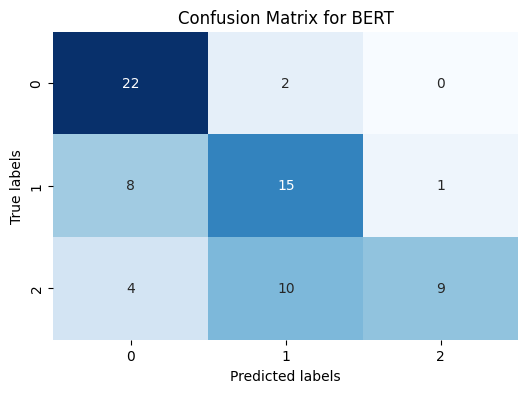

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_array, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for BERT')
plt.show()